# Data Analytics Project: [Bike Sharing Dataset]
- **Name:** [Rayhan Arlistya Pratama]
- **Email:** [rayhanpratama99@gmail.com]
- **ID Dicoding:** [rayhan_arlistya]

## Define Business Questions

- Question 1 = How is the recent years' trend of the bike sharing usage?
- Question 2 = Does the season have an impact on the number of bike sharing usage?
- Question 3 = Does weather condition affects the number of bike sharing usage?

## Import All Packages/Library Used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data
In this process, we will gather the data that we have. The Bike Sharing Dataset has two data: day.csv and hr.csv

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Dataset characteristics
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
- instant: record index
- dteday : date

#The season code changed due to the data showed that Summer had a lower temp than Winter (That doesn't make any sense). So that I changed the season code as follow:
- season : season (1:Winter, 2:Springer, 3:Summer, 4:Fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

### Assessing Data day_df

In [4]:
#Check the data type
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#Check missing values
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#Check duplicate data
print("Total of data duplications: ", day_df.duplicated().sum())

Total of data duplications:  0


In [7]:
#Check statistical values
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Assessing Data hour_df

In [8]:
#Check the data type
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
#Check missing values
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#Check duplicate data
print("Total of data duplications: ", hour_df.duplicated().sum())

Total of data duplications:  0


In [11]:
#Check statistical values
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Based on the data shown, both `day_df` and `hour_df` contain similar information, but `day_df` doesn't include the hr column. Given the three questions we have, since `hour_df` provides more detailed data per hour throughout the day, we will use the `hour_df` dataset.

Then based on the assessing data process, there are some data that need to be fixed:
1. Renaming the columns to make it more clear to understand
2. `dteday` column has the Object data type, and need to be changed to date data type
3. `season`, `yr`, `mnth`, `holiday`, `weekday`, and `workingday` are using code of number, so that these need to be changed with their original value.
4. `temp`, `atemp`, `hum`, `windspeed` need to be converted to the before normalized values.
5. `season` code shown that summer had lower temp than winter(its doesnt make any sense), so I adjusted the season code to make it more make sense.

Lets start cleaning the data!


### Cleaning Data

In [12]:
# Rename the Columns
hour_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'weathersit': 'weather_cond', 
                        'temp': 'temperature', 'atemp': 'feeling_temp', 'hum': 'humidity', 'casual': 'casual_user', 
                        'registered': 'registered_user', 'cnt': 'total_users'}, inplace=True)

# Convert date data type
hour_df['date'] = pd.to_datetime(hour_df['date'])

# Change code to original value
#This is the original value:
season = {1:'Winter', 2: 'Springer', 3: 'Summer', 4: 'Fall'}
year = {0:2011, 1:2012}
month = {1: 'January', 2:'February', 3:'March', 4:'April',5:'May', 6:"June", 
         7: 'July', 8:'August', 9:'September', 10:'October', 11:'November',
         12:'December'}
day = {0: 'Sunday', 1: 'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday',
       5:'Friday', 6:'Saturday'}
#Replace the old value to original value
hour_df['season'].replace(season, inplace=True)
hour_df['year'].replace(year, inplace=True)
hour_df['month'].replace(month, inplace=True)
hour_df['weekday'].replace(day, inplace=True)
hour_df['holiday'].replace({0: 'Not Holiday', 1: 'Holiday'}, inplace=True)
hour_df['workingday'].replace({1: 'Workingday', 0:'Weekend/Holiday'}, inplace=True)
hour_df['weather_cond'].replace({1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy', 3: 'Light Snow/Rain', 4: ' Heavy Rain/Thunderstorm'}, inplace=True)

#Multiply back the data to make it as it was before it was divided
hour_df['temperature'] = hour_df['temperature'].apply(lambda x: x * 41 if x <= 1 else x).round(2)
hour_df['feeling_temp'] = hour_df['feeling_temp'].apply(lambda x: x * 50 if x <= 1 else x).round(2)
hour_df['humidity'] = hour_df['humidity'].apply(lambda x: x * 100 if x <= 1 else x).round(2)
hour_df['windspeed'] = hour_df['windspeed'].apply(lambda x: x * 67 if x <= 1 else x).round(2)

#Save the cleaned data into new CSV
hour_df.to_csv("Cleaned Bike Sharing Hour.csv", index=False)
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_cond,temperature,feeling_temp,humidity,windspeed,casual_user,registered_user,total_users
0,1,2011-01-01,Winter,2011,January,0,Not Holiday,Saturday,Weekend/Holiday,Clear/Partly Cloudy,9.84,14.40,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,Not Holiday,Saturday,Weekend/Holiday,Clear/Partly Cloudy,9.02,13.64,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,Not Holiday,Saturday,Weekend/Holiday,Clear/Partly Cloudy,9.02,13.64,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,Not Holiday,Saturday,Weekend/Holiday,Clear/Partly Cloudy,9.84,14.40,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,Not Holiday,Saturday,Weekend/Holiday,Clear/Partly Cloudy,9.84,14.40,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Grouping data by columns

In [13]:
# Group bike sharing by month
hour_df.groupby(by='month').agg({
    'total_users': ['max', 'min', 'mean', 'sum']
}).sort_values(by=('total_users', 'sum'), ascending=False)

total_users                        
                  max min        mean     sum
month                                        
August            941   1  238.097627  351194
June              900   1  240.515278  346342
September         977   1  240.773138  345991
July              913   1  231.819892  344948
May               873   1  222.907258  331686
October           963   1  222.158511  322352
April             822   1  187.260960  269094
November          729   1  177.335421  254831
March             957   1  155.410726  228920
December          759   1  142.303439  211036
February          610   1  112.865026  151352
January           559   1   94.424773  134933

Based on the output, It can be concluded that the month that has the highest `sum` is August. Meanwhile, the lowest `sum` was in January.

In [14]:
#Group bike sharing by weather
hour_df.groupby(by='weather_cond').agg({
    'total_users': ['max', 'min', 'mean', 'sum']
}).sort_values(by=('total_users', 'sum'), ascending=False)

total_users                         
                                 max min        mean      sum
weather_cond                                                 
Clear/Partly Cloudy              977   1  204.869272  2338173
Misty/Cloudy                     957   1  175.165493   795952
Light Snow/Rain                  891   1  111.579281   158331
 Heavy Rain/Thunderstorm         164  23   74.333333      223

Based on the output, Clear/Partly Cloudly is the weather with the highest bike sharing usage. 

In [15]:
#Group bike sharing by holiday
hour_df.groupby(by='holiday').agg({
    'total_users': ['max', 'min', 'mean', 'sum']
}).sort_values(by=('total_users', 'sum'), ascending=False)

total_users                        
                    max min       mean      sum
holiday                                        
Not Holiday         977   1  190.42858  3214244
Holiday             712   1  156.87000    78435

Based on the output, people prefer to use the bike sharing at not holiday rather than holday.

In [16]:
hour_df.groupby(by='weekday').agg({
    'total_users':['max','min','mean', 'sum']
}).sort_values(by=('total_users', 'sum'), ascending=False)

total_users                        
                  max min        mean     sum
weekday                                      
Friday            957   1  196.135907  487790
Thursday          976   1  196.436665  485395
Saturday          783   1  190.209793  477807
Wednesday         977   1  191.130505  473048
Tuesday           970   1  191.238891  469109
Monday            968   1  183.744655  455503
Sunday            776   1  177.468825  444027

Based on the output, Friday is the day with the highest usage of bike sharing.

In [17]:
hour_df.groupby(by='season').agg({
    'casual_user': 'mean',
    'registered_user': 'mean',
    'total_users': ['max', 'min', 'mean', 'sum']
}).sort_values(by=('total_users', 'sum'), ascending=False)

casual_user registered_user total_users                         
                mean            mean         max min        mean      sum
season                                                                   
Summer     50.287144      185.729093         977   1  236.016237  1061129
Springer   46.160581      162.183488         957   1  208.344069   918589
Fall       30.666824      168.202032         967   1  198.868856   841613
Winter     14.290901       96.823668         801   1  111.114569   471348

Based on the output, Summer is the season with the highest usage of bike sharing.

### Condition's Histogram

#Before making the histogram, we need to make a table contain of temperature, feeling_temp, humidity, and windspeed from `hour_df` then save it as condition_df

In [18]:
# Extract temperature, feeling_temp, humidity, and windspeed
condition = ['temperature', 'feeling_temp', 'humidity', 'windspeed']
condition_df = hour_df[condition]
condition_df.describe()

,temperature,feeling_temp,humidity,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788484,62.722884,12.736233
std,7.894801,8.592587,19.292983,8.196891
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.660000,48.000000,7.000000
50%,20.500000,24.240000,63.000000,13.000000
75%,27.060000,31.060000,78.000000,17.000000
max,41.000000,50.000000,100.000000,57.000000


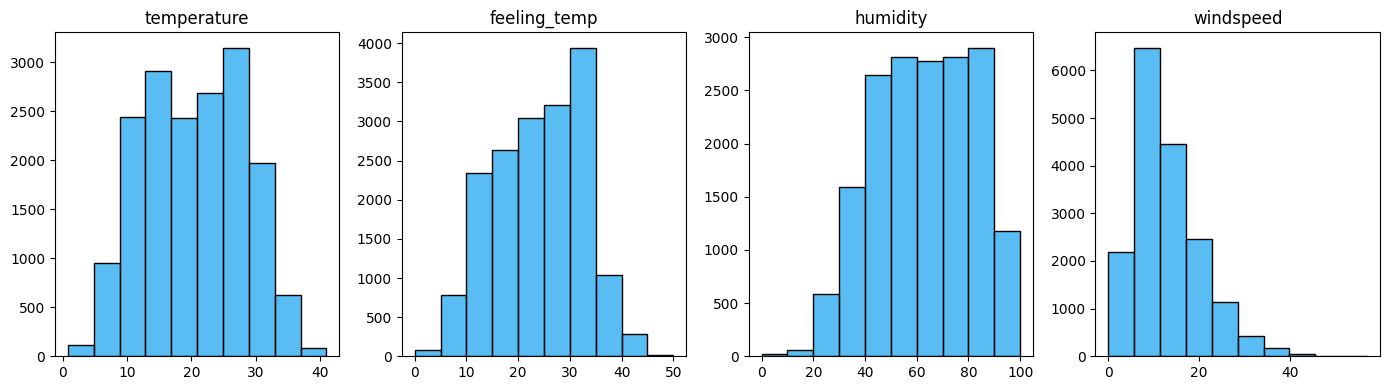

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# Iterate every axes in subplots to create histogram for each one
for i, ax in enumerate(axes):
    sns.histplot(x=condition_df[condition[i]], ax=ax, bins=10, color='#22a7f0')
    ax.set_title(condition[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
plt.tight_layout()
plt.show()

The histogram results of `temperature`, `feeling_temp`, and `humidity` shows normal distribution, and for the histogram results of `windspeed` shows right-skewed distribution.

### Condition's Boxplot

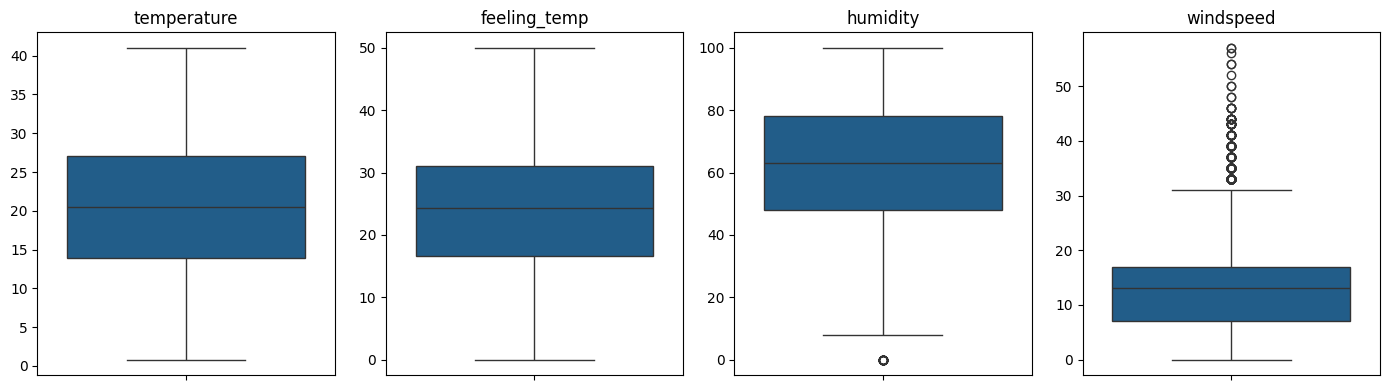

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

for i, ax in enumerate(axes):
    sns.boxplot(y=condition_df[condition[i]], ax=ax, color='#115f9a')
    ax.set_title(condition[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
plt.tight_layout()
plt.show()

The boxplot results of `temperature`, `feeling_temp`, and `humidity` shows no outliers, and for the boxplot results of `windspeed` shows there were outliers. Eventhough there were outliers in `windspeed` we decided to not remove it since the max value of 57 mph is realistic to be happen in real life condition.

### Bike Sharing Users in Daily Time Series

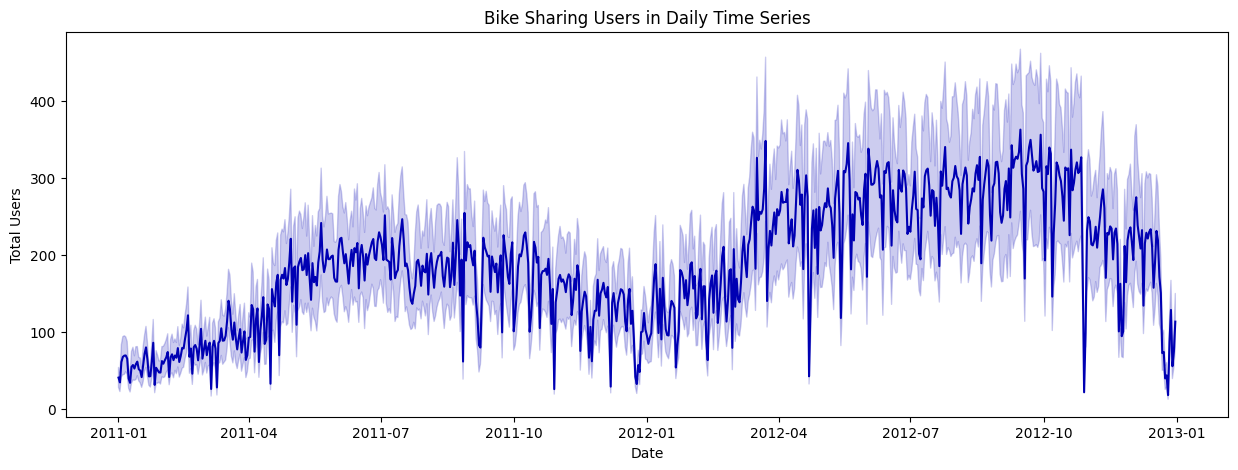

In [21]:
#Create a line plot shows the distribution of bike sharing users in daily time series
plt.figure(figsize=(15, 5))

sns.lineplot(x='date', y='total_users', data= hour_df, color='#0000b3')
plt.title('Bike Sharing Users in Daily Time Series')
plt.xlabel('Date')
plt.ylabel('Total Users')
plt.show()


Based on the line plot, the pattern of `total_users` bike sharing are low in the beginning of the year,  increase in the midldle of the year, then decreased again in the end of the year.

### Bike Sharing Users by Season

In [22]:
users_season_df = hour_df.groupby('season').agg({
    'casual_user': 'sum',
    'registered_user': 'sum',
    'total_users': 'sum'
})
users_season_df.head()

,casual_user,registered_user,total_users
season,,,
Fall,129782,711831,841613
Springer,203522,715067,918589
Summer,226091,835038,1061129
Winter,60622,410726,471348


In [23]:
users_season_df = users_season_df.reset_index()

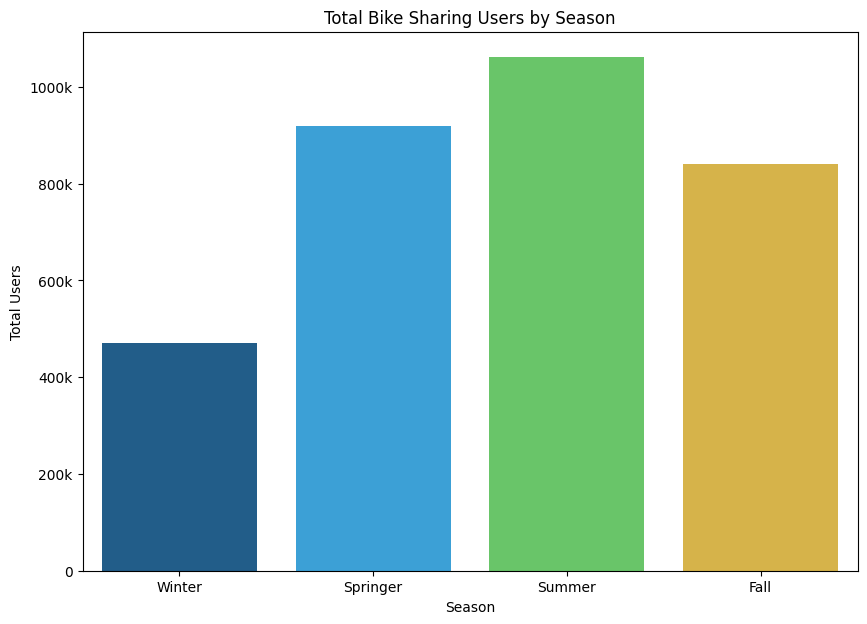

In [24]:
#Create the Bar Plot of Bike Sharing Users by Season
season_order = ['Winter', 'Springer', 'Summer', 'Fall']
color_palette=['#115f9a', '#22a7f0', '#5ad45a', '#edbf33']

plt.figure(figsize=(10, 7))

sns.barplot(x='season', y='total_users', data=users_season_df, order=season_order, palette= color_palette)
plt.title('Total Bike Sharing Users by Season')
plt.xlabel('Season')
plt.ylabel('Total Users')
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000], ['0', '200k', '400k', '600k', '800k', '1000k'])
plt.show()

Based on the bar plot, summer is the highest season for bike sharing users, and the lowest is during winter.

### Bike Sharing Users by Weekday

In [25]:
weekday_users = hour_df.groupby("weekday").agg({
    'casual_user': 'sum',
    'registered_user': 'sum',
    'total_users': 'sum'
})
weekday_users.head()

,casual_user,registered_user,total_users
weekday,,,
Friday,78238,409552,487790
Monday,70784,384719,455503
Saturday,153852,323955,477807
Sunday,140521,303506,444027
Thursday,61460,423935,485395


In [26]:
weekday_users = weekday_users.reset_index()
weekday_users.head()

,weekday,casual_user,registered_user,total_users
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395


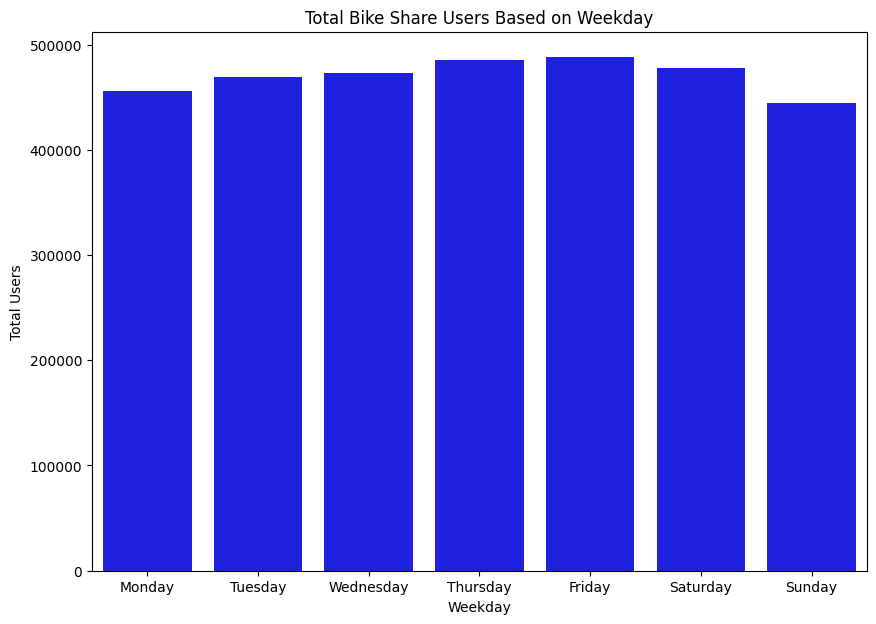

In [27]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,7))

sns.barplot(x='weekday', y='total_users', data=weekday_users, order=day_order, color='blue')

plt.xlabel("Weekday")
plt.ylabel("Total Users")
plt.title("Total Bike Share Users Based on Weekday")

plt.show()

### Bike Sharing Users by Weather

In [28]:
weather_condition = hour_df.groupby('weather_cond').agg({
    'casual_user': 'sum',
    'registered_user': 'sum',
    'total_users': 'sum'
})
weather_condition.head()

,casual_user,registered_user,total_users
weather_cond,,,
Heavy Rain/Thunderstorm,8,215,223
Clear/Partly Cloudy,462745,1875428,2338173
Light Snow/Rain,22783,135548,158331
Misty/Cloudy,134481,661471,795952


In [29]:
weather_condition = weather_condition.reset_index()
weather_condition.head()

,weather_cond,casual_user,registered_user,total_users
0,Heavy Rain/Thunderstorm,8,215,223
1,Clear/Partly Cloudy,462745,1875428,2338173
2,Light Snow/Rain,22783,135548,158331
3,Misty/Cloudy,134481,661471,795952


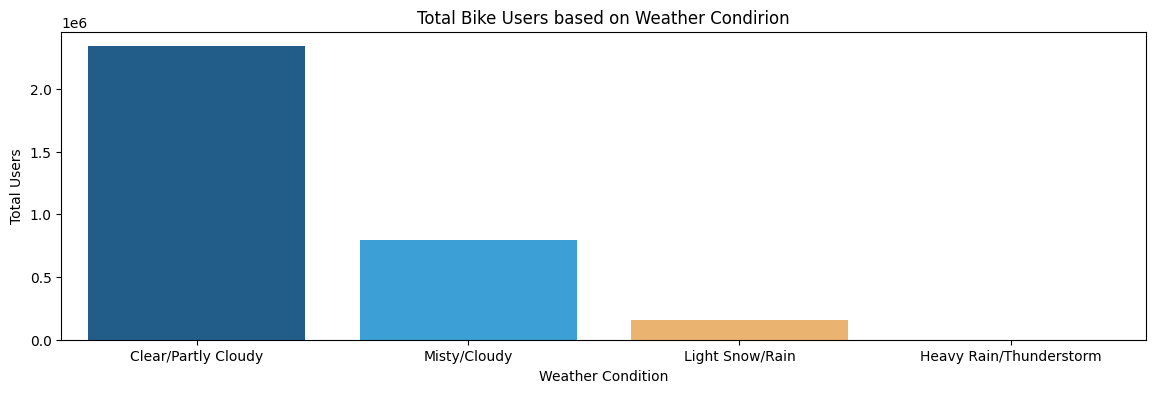

In [30]:
weather_order = ['Clear/Partly Cloudy', 'Misty/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Thunderstorm']
color_palette=['#115f9a', '#22a7f0', '#ffb55a', '#b30000']
plt.subplots(figsize=(14,4))
sns.barplot(x='weather_cond', y='total_users', data=weather_condition, order=weather_order, palette=color_palette)
plt.xlabel('Weather Condition')
plt.ylabel('Total Users')
plt.title('Total Bike Users based on Weather Condirion')
plt.show()

Bases on the bar plot, clear/partly clody is the highest weather for bike sharing users, and the lowest is during Heavy Rain/Thunderstorm

## Visualization & Explanatory Analysis

### Question 1: How is the recent years' trend of the bike sharing usage?

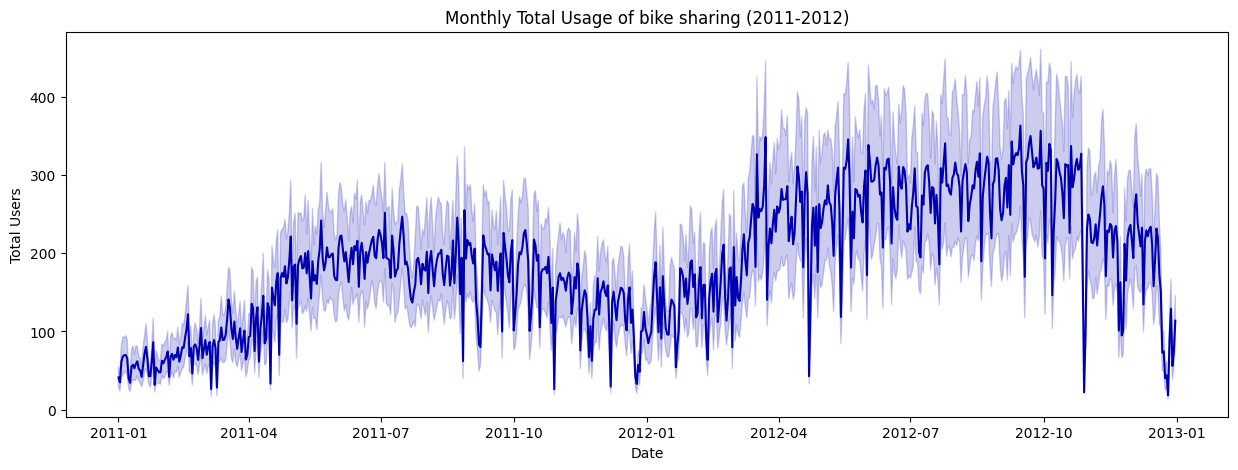

In [31]:
#Create a line plot shows the distribution of bike sharing users in daily time series
plt.figure(figsize=(15, 5))

sns.lineplot(x='date', y='total_users', data= hour_df, color='#0000b3')
plt.title('Monthly Total Usage of bike sharing (2011-2012)')
plt.xlabel('Date')
plt.ylabel('Total Users')
plt.show()

To see the data more clearly and readable, we will pivot the data into monthly figures. We'll utilize the `resample` function to aggregate the time-series data from daily to monthly.

In [32]:
#Resample from daily to monthly
monthly_users_df = hour_df.resample(rule='M', on='date').agg({
    'casual_user': 'sum',
    'registered_user' : 'sum',
    'total_users': 'sum'
})
#Change the yyyy-mm-dd to yyyy-mm only
monthly_users_df.index = monthly_users_df.index.strftime('%b-%y')

#Reset the index
monthly_users_df =  monthly_users_df.reset_index()

#Change the date column name
monthly_users_df = monthly_users_df.rename(columns={'date':'month-year'})
monthly_users_df.head()

,month-year,casual_user,registered_user,total_users
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821


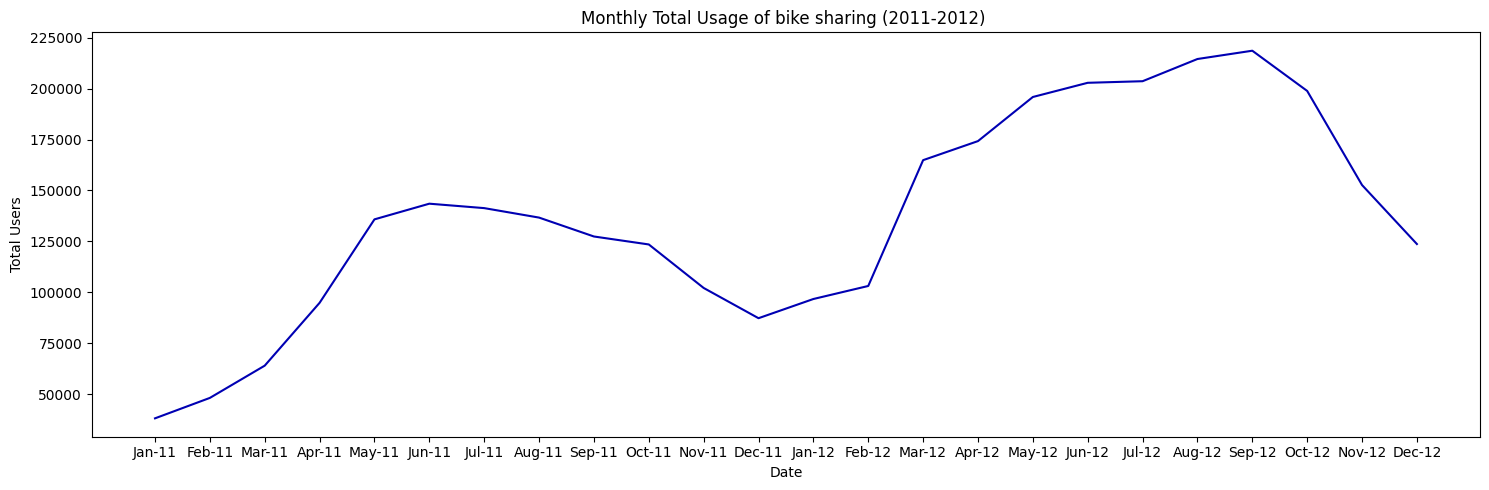

In [33]:
#Make a line plot with month-year timestamps

plt.figure(figsize=(15, 5))

sns.lineplot(x='month-year', y='total_users', data=monthly_users_df, color='#0000b3')
plt.title("Monthly Total Usage of bike sharing (2011-2012) ")
plt.xlabel("Date")
plt.ylabel("Total Users")

plt.tight_layout()
plt.show()

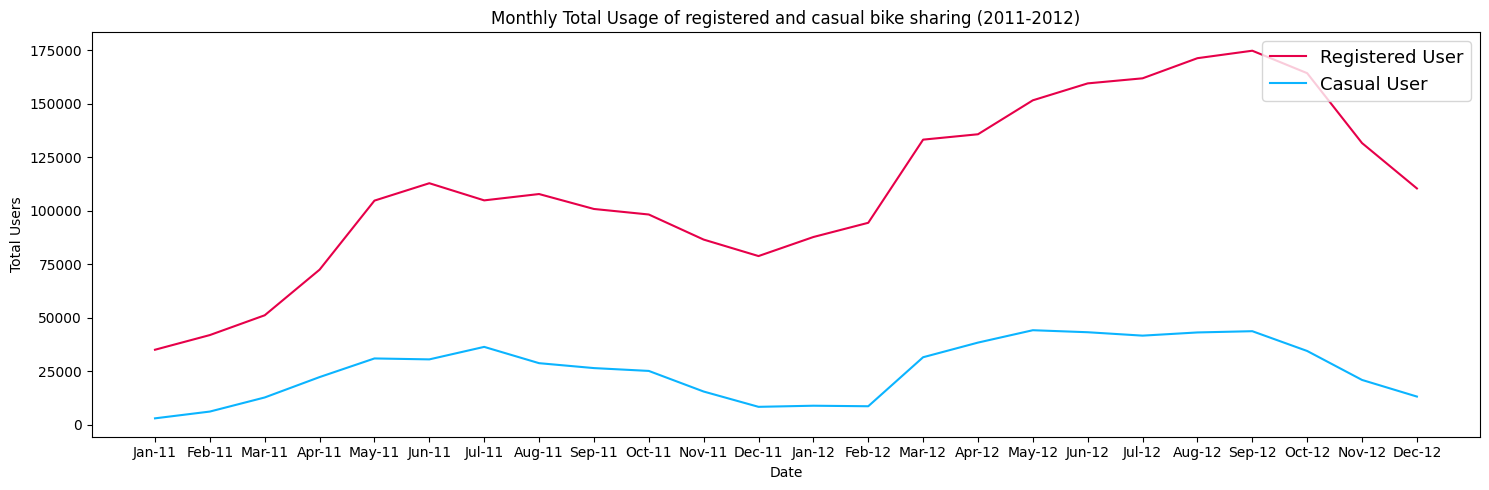

In [34]:
#Make a line plot with registered and casual user seperated

plt.figure(figsize=(15, 5))

sns.lineplot(x="month-year", y="registered_user", data=monthly_users_df, label='Registered User', color='#e60049')
sns.lineplot(x="month-year", y="casual_user", data=monthly_users_df, label='Casual User', color='#0bb4ff')
plt.title("Monthly Total Usage of registered and casual bike sharing (2011-2012)")
plt.xlabel("Date")
plt.ylabel("Total Users")

plt.legend(loc='upper right', fontsize=13)


plt.tight_layout()
plt.show()

### Answer:
So, the recent years trend of the bike sharing usage are:
1. The recent years trend of the bike sharing usage start low in the beginning of the year(Q1), start to increase in the middle of the year(Q2), and start to decrease in the end of the year( Q4).
2. The total users of bike sharing in 2012 are higher than in 2011.
3. The total register user of bike sharing are higher than the casual user.

### Question 2: Does the season have an impact on the number of bike sharing usage?

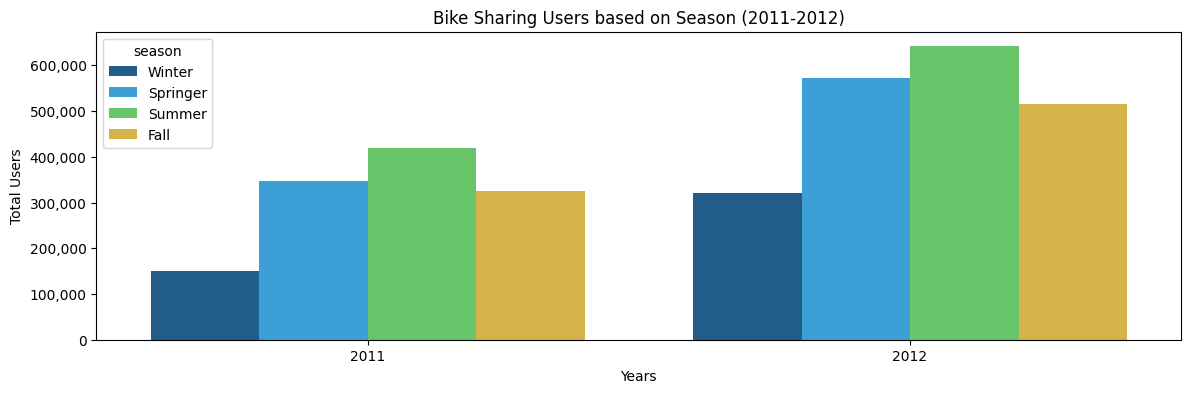

In [35]:
#Prepare data
hour_df['season'] = pd.Categorical(hour_df['season'],categories=['Winter','Springer','Summer','Fall'], ordered=True)
season_users = pd.DataFrame(hour_df.groupby(['year','season'])['total_users'].sum())
color_palette=['#115f9a', '#22a7f0', '#5ad45a', '#edbf33']

#Create the bar plot
plt.subplots(figsize=(14,4))
sns.barplot(x='year' , y='total_users', data=season_users, hue='season', palette=color_palette)

#Makes the Y-ticks to become more readable
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.ylabel('Total Users')
plt.xlabel('Years')
plt.title('Bike Sharing Users based on Season (2011-2012)')

plt.tight_layout
plt.show()

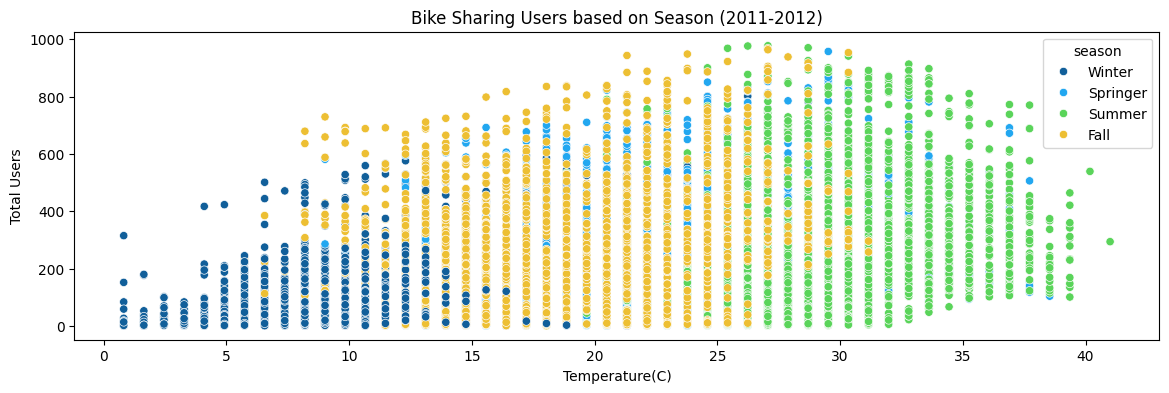

In [36]:
#Create the scatter plot to check the correlation between total users and season
plt.subplots(figsize=(14,4))
sns.scatterplot(data=hour_df, x='temperature', y='total_users', hue='season', palette= color_palette)
plt.title('Bike Sharing Users based on Season (2011-2012)')
plt.ylabel('Total Users')
plt.xlabel('Temperature(C)')
plt.tight_layout
plt.show()

### Answer:
 Yes, the season have an impact on the number of bike sharing usage:
1. Based on those data, the highest total users of bike sharing is in `Summer`, then `Springer`, then `Fall`, and the lowest is `Winter`.
2. Based on those data, the higher/warmer `temperature` (`Summer`, `Springer`) the higher `total users` bike sharing  users. Then it's also proved by `Fall` has higher total users than `Winter`.

### Question 3 : Does weather condition affects the number of bike sharing usage?

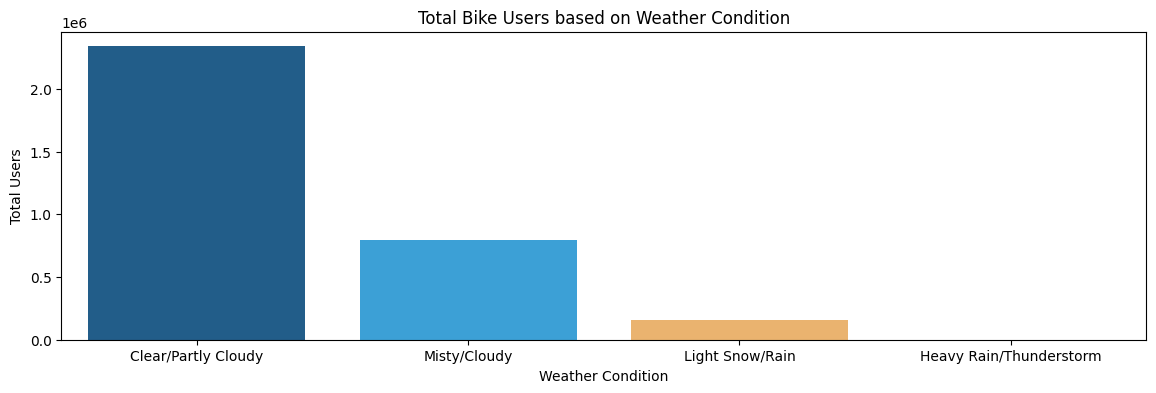

In [37]:
# Create data groupby weather
weather_condition = hour_df.groupby('weather_cond').agg({
    'casual_user': 'sum',
    'registered_user': 'sum',
    'total_users': 'sum'
})

#Reset the index
weather_condition = weather_condition.reset_index()

#Visualize the data
weather_order = ['Clear/Partly Cloudy', 'Misty/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Thunderstorm']
color_palette=['#115f9a', '#22a7f0', '#ffb55a', '#b30000']
plt.subplots(figsize=(14,4))
sns.barplot(x='weather_cond', y='total_users', data=weather_condition, order=weather_order, palette=color_palette)
plt.xlabel('Weather Condition')
plt.ylabel('Total Users')
plt.title('Total Bike Users based on Weather Condition')
plt.show()



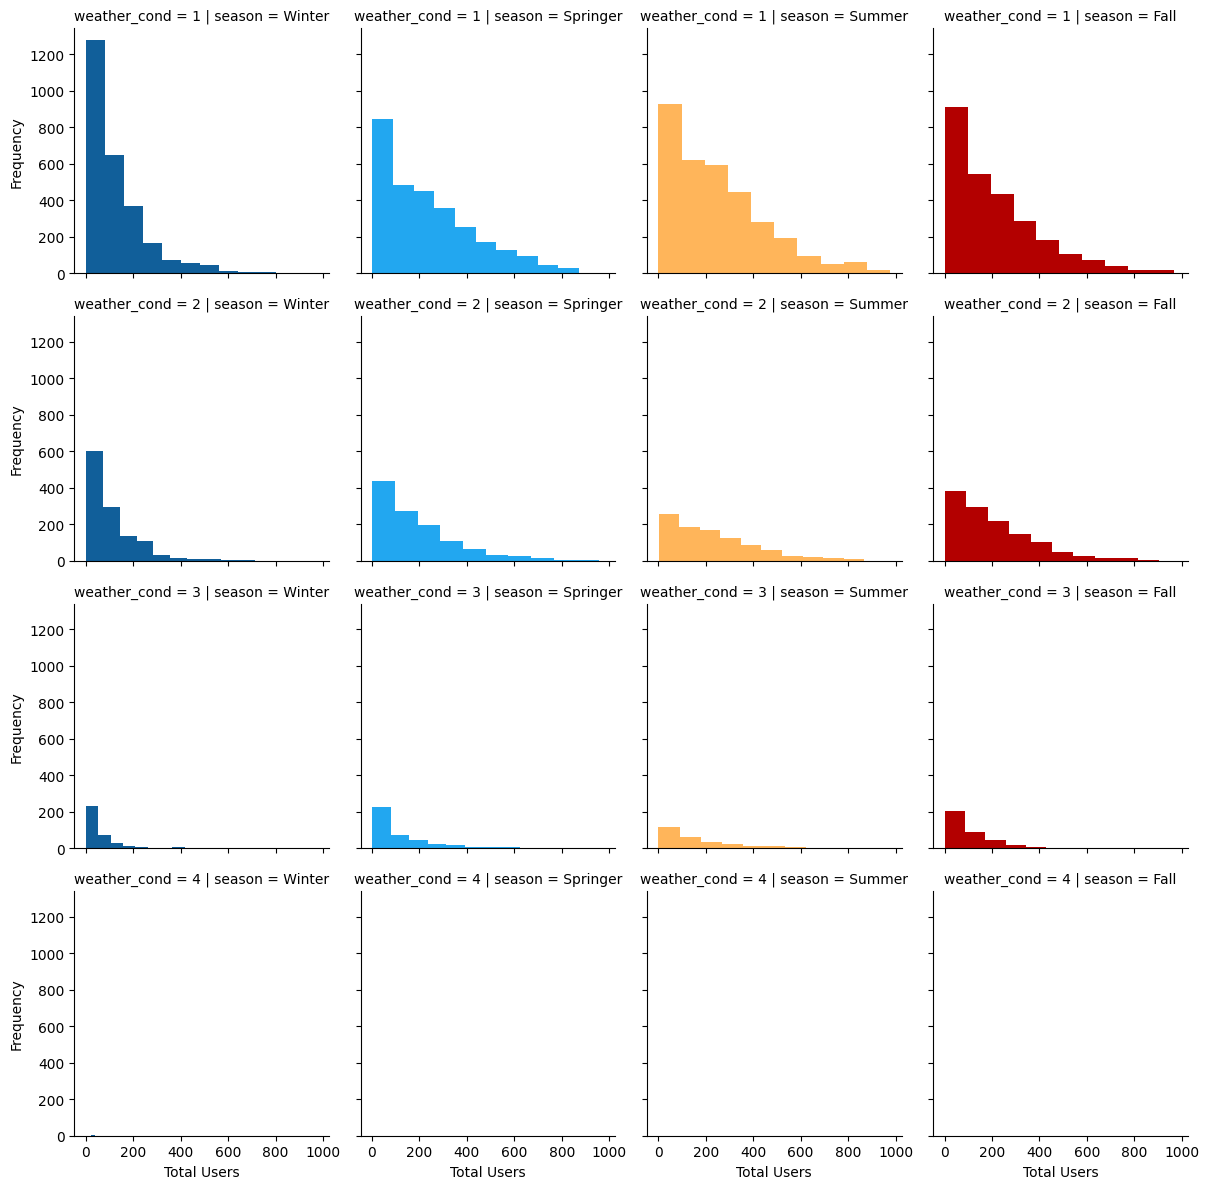

In [38]:
#Change the `weather_cond` to code, so that it's more readable
hour_df['weather_cond'].replace({'Clear/Partly Cloudy': 1, 'Misty/Cloudy': 2, 'Light Snow/Rain': 3, ' Heavy Rain/Thunderstorm': 4}, inplace=True)
#Create visualizations of bike sharing usage in every season with every weather condition that occurred during those seasons.
g = sns.FacetGrid(data=hour_df, col='season', row='weather_cond', hue='season', palette=['#115f9a', '#22a7f0', '#ffb55a', '#b30000'])
g.map(plt.hist, 'total_users')
g.set_xlabels('Total Users')
g.set_ylabels('Frequency')
plt.show()

### Answer:
Yes, the weather condition affects the number of bike sharing usage:
1. Based on the data, bike sharing usage is influenced by weather conditions. Clearer weather leads to increased bike sharing usage, while heavier weather conditions such as heavy rain or thunderstorms result in decreased bike sharing usage. And this conditions always true for all seasons.

## Conclusion

`1. Question 1 Conclusion: How is the recent years' trend of the bike sharing usage?`

The recent years' trend of bike sharing usage shows seasonal pattern with peaks in the middle of the year and going down towards the end of the year. And also there has been an overall increase in bike sharing usage in 2012 from 2011, with registered users constitute a larger portion of the user compared to casual users. This findings can be useful for bike sharing operators and policymakers in understanding usage patterns and making decisions related to resource allocation, marketing strategies, and service improvements.
 
`2. Question 2 Conclusion: Does the season have an impact on the number of bike sharing usage?`

The seasons do indeed affect the number of bike sharing usage, with warmer seasons typically had the higher users. This findings can be valuable for bike sharing operators when organizing services, designing marketing strategies, and allocating resources throughout the year to accommodate the varying demand influenced by seasonal changes.

`3. Question 3 Conclusion: Does weather condition affects the number of bike sharing usage?`

The weather conditions do indeed have a notable impact on bike sharing usage. The clearer the weather tends to correspond with higher levels of bike sharing usage, whereas adverse weather conditions like heavy rain or thunderstorms typically lead to decreased usage. Importantly, this relationship between weather and bike sharing usage holds true across all seasons. This insight is valuable for bike sharing operators in understanding and predicting fluctuations in demand based on weather patterns. By considering weather forecasts and adapting service provisions accordingly, operators can optimize resource allocation and enhance overall user experience, ultimately ensuring better service accessibility and satisfaction for riders throughout various weather conditions.


